In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
Sim_res = Path.cwd().parent.parent / 'MagnetCode' / "Simulation Results"
Photos_dir = Path.cwd() / 'Images'
Here = Path.cwd()
from scipy.optimize import minimize

# Сбор статистики

### 100-1200 базовое

In [2]:
DIR = Sim_res / 'ISAW' / 'TrISAW' / 'geo'
if DIR.exists():
    dataset = list(DIR.glob('Geo*.txt'))
    #print(*list(map(lambda x: x.name, dataset)), sep='\n')

In [3]:
def collect(dataset, full_data=None, sort=False):
    for d in dataset:
        data = pd.read_csv(d, sep=' ', index_col=False)
        if full_data is None:
            full_data = data
        else:
            full_data = pd.concat([full_data, data], ignore_index=True)
    if sort:
        full_data.sort_values(by=['J', 'N'], inplace=True, ignore_index=True)
    return full_data

data = collect(dataset, sort=True)

### крит-зона

In [13]:
DIR = Sim_res / 'Ising' / 'TrIs_crit' / 'energy'
dataset = list(DIR.glob('BC*.txt'))
#print(*list(map(lambda x: x.name, dataset)), sep='\n')

In [14]:
data = collect(dataset, data, True)

### Проверка 

In [4]:
data.head(5)

,N,J,h,mean_R_sq,err_mean_R_sq,mean_R_gyr_sq,err_mean_R_gyr_sq,lambda1,err_lambda1,lambda2,...,err_bulk2,bulk3,err_bulk3,bulk4,err_bulk4,bulk5,err_bulk5,bulk6,err_bulk6,steps
0,100,0.0,0,942,32,132.974,0.431542,118.981,0.459165,13.9930,...,0.000400,0.368584,0.000391,0.184612,0.000264,0.060455,0.000177,0.011513,0.000075,4000000000
1,300,0.0,0,4914,76,692.603,3.216770,619.569,3.228920,73.0344,...,0.000304,0.372344,0.000184,0.188408,0.000209,0.062140,0.000117,0.011910,0.000065,4000000000
2,600,0.0,0,14041,165,1974.850,11.811000,1767.860,12.405800,206.9890,...,0.000346,0.373487,0.000270,0.189872,0.000241,0.062722,0.000167,0.012002,0.000061,3000000000
3,1200,0.0,0,39839,879,5587.550,86.135800,5007.080,91.093600,580.4670,...,0.000535,0.373324,0.000334,0.190256,0.000308,0.063492,0.000292,0.012268,0.000089,3000000000
4,100,0.1,0,805,29,116.347,0.319303,103.738,0.343062,12.6084,...,0.000416,0.362854,0.000349,0.214912,0.000279,0.085447,0.000256,0.021737,0.000130,4000000000


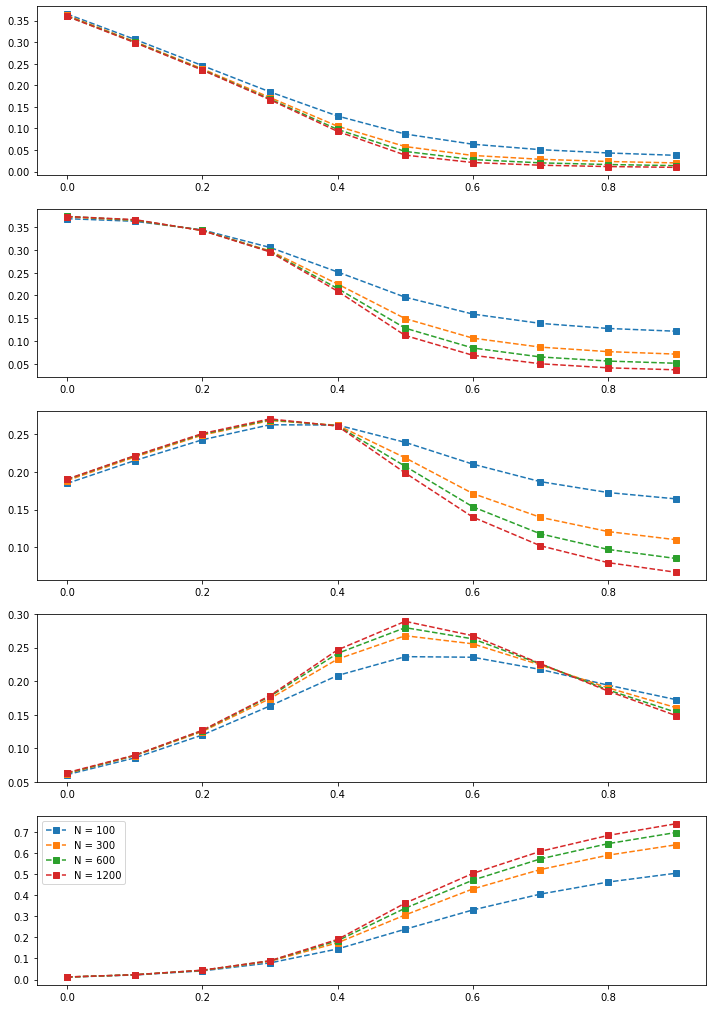

In [10]:
x = 'J'
y_names = ['bulk2', 'bulk3','bulk4','bulk5','bulk6']

fig, ax = plt.subplots(5,1,figsize=(12,18))
Ns = data.N.unique()
for i, y_name in enumerate(y_names):
    for n in Ns:
        dataN = data[(data.N == n)]
        ax[i].plot(x, y_name, 's--', data=dataN, label=f'N = {n}')
ax[i].legend()

In [5]:
data.rename(columns={'Unnamed: 19': 'steps'}, inplace=True)

In [7]:
data.to_csv(Here / 'CSVs' / 'TrISAW_geo.csv', index=False)

# Графики

In [8]:
data = pd.read_csv(Here / 'CSVs' / 'TrISAW_energy.csv')
data.head(5)

,N,J,h,mean_R_sq,err_mean_R_sq,mean_R_gyr_sq,err_mean_R_gyr_sq,mean_e,err_mean_e,mean_e_sq,err_mean_e_sq,mean_e_fourth,err_mean_e_fourth,mean_m,err_mean_m,mean_m_sq,err_mean_m_sq,mean_m_fourth,err_mean_m_fourth,steps
0,100,0.0,0,1380,40,198.596,0.069118,-0.161115,0.000042,0.028486,0.000016,0.001117,1.478030e-06,1,1.146380e-10,1,1.146380e-10,1,1.146380e-10,217000000000
1,300,0.0,0,10901,111,1687.860,0.530404,-0.156077,0.000027,0.025217,0.000008,0.000724,4.399370e-07,1,9.505270e-11,1,9.505270e-11,1,9.505270e-11,165000000000
2,600,0.0,0,41927,226,6760.340,2.853890,-0.153343,0.000030,0.023961,0.000009,0.000618,4.698080e-07,1,1.087090e-10,1,1.087090e-10,1,1.087090e-10,162000000000
3,1200,0.0,0,165479,437,28136.300,17.754300,-0.150368,0.000029,0.022843,0.000009,0.000543,4.423340e-07,1,8.800170e-11,1,8.800170e-11,1,8.800170e-11,198000000000
4,100,0.1,0,1395,42,187.042,0.064482,-0.185468,0.000043,0.037394,0.000017,0.001871,1.769060e-06,1,1.182780e-10,1,1.182780e-10,1,1.182780e-10,210000000000


In [9]:
data.steps.describe()

count    4.000000e+01
mean     1.744750e+11
std      3.372132e+10
min      1.120000e+11
25%      1.527500e+11
50%      1.665000e+11
75%      2.090000e+11
max      2.170000e+11
Name: steps, dtype: float64

In [24]:
data.columns

Index(['N', 'J', 'h', 'mean_R_sq', 'err_mean_R_sq', 'mean_R_gyr_sq',
       'err_mean_R_gyr_sq', 'mean_e', 'err_mean_e', 'mean_e_sq',
       'err_mean_e_sq', 'mean_e_fourth', 'err_mean_e_fourth', 'mean_m',
       'err_mean_m', 'mean_m_sq', 'err_mean_m_sq', 'mean_m_fourth',
       'err_mean_m_fourth', 'steps'],
      dtype='object')

In [ ]:
x = 'J'
y_name = 'mean_e'
ye_name = 'err_mean_e'

fig, ax = plt.subplots(figsize=(12,9))
Ns = data.N.unique()
for n in Ns:
    dataN = data[(data.N == n)]
    ax.errorbar(x=x, y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')
    
#axins=ax.inset_axes([0.65, 0.5, 0.3, 0.45])
#for n in Ns:
#    dataN = data[(data.N == n) & (data.J > 0)]
#    axins.errorbar(x='J', y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')
#x1, x2, y1, y2 = 0.45, 0.6, -2.5, -1.25
#axins.set_xlim(x1, x2)
#axins.set_ylim(y1, y2)
#axins.set_xticks(np.linspace(x1, x2, 6))
#axins.tick_params(direction='in')
#axins.grid()
#axins.set_xticklabels([])
#axins.set_yticklabels([])
#ax.indicate_inset_zoom(axins, edgecolor="black", label='')


plt.xlabel('J', fontsize=20)
plt.ylabel(r'$\langle e \rangle$ / J', fontsize=20)
plt.legend(loc=3, fontsize=20);
plt.xticks(np.linspace(0,0.9,10));
plt.grid();
plt.tick_params(labelsize=20)
plt.tight_layout()
plt.savefig(Photos_dir / 'TrISAW_E.png')

### $\langle e \rangle / J$

### $R^2(N)$

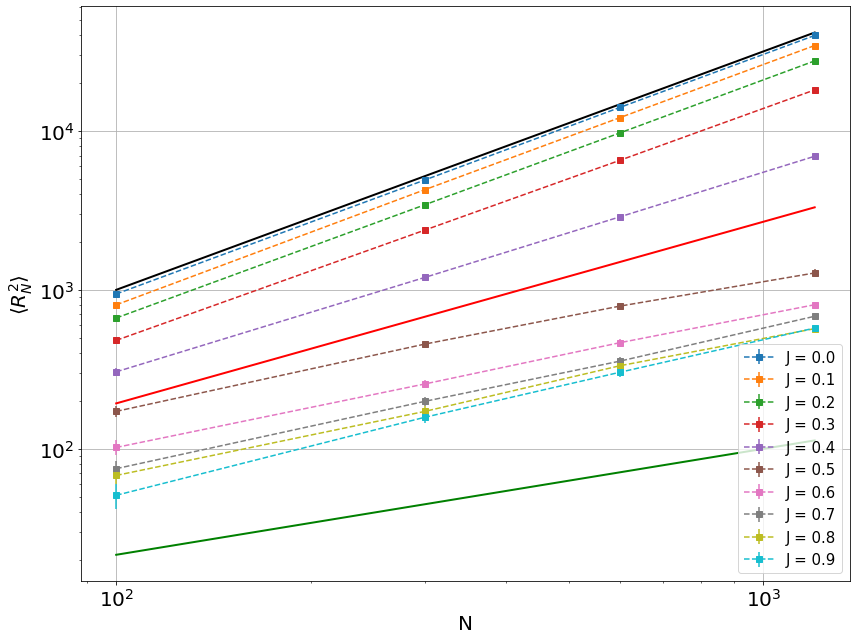

In [15]:
x = 'N'
y_name = 'mean_R_sq'
ye_name = 'err_mean_R_sq'

fig, ax = plt.subplots(figsize=(12,9))
Js = data.J.unique()
Ns = data.N.unique()
for j in Js:
    dataN = data[data.J == j]
    ax.errorbar(x=x, y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'J = {j}')

plt.xlabel('N', fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.plot(Ns, Ns ** (2 * 3/4), 'k-', linewidth=2)
plt.plot(Ns, Ns ** (2 * 4/7), 'r-', linewidth=2)
plt.plot(Ns, Ns ** (2 * 1/3), 'g-', linewidth=2)
plt.ylabel(r'$\langle R^2_N \rangle$', fontsize=20)
plt.legend(loc=4, fontsize=15);
plt.grid();
plt.tick_params(labelsize=20)
plt.tight_layout()
#plt.savefig(Photos_dir / 'TrISAW_R2log.png')

### $R^{2} / N^{2\nu}$

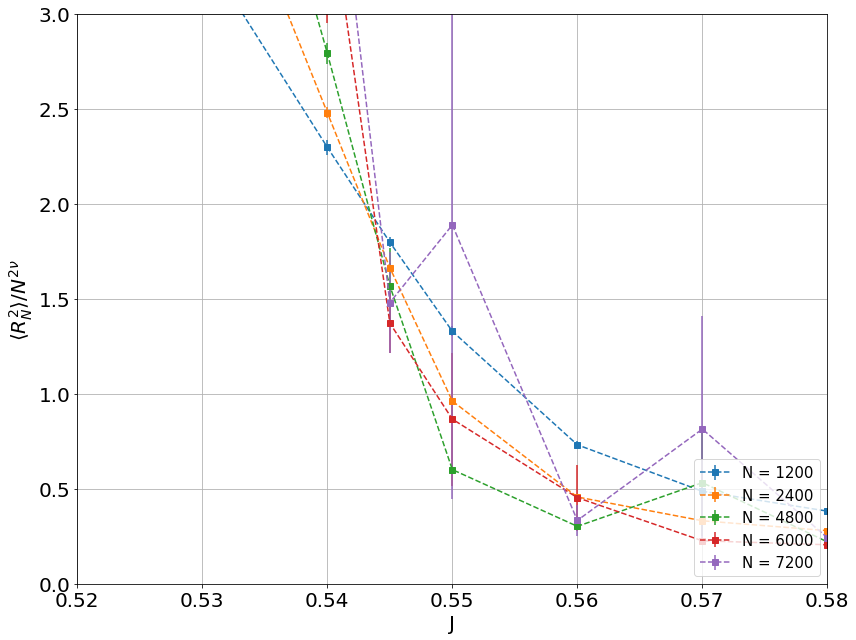

In [17]:
x = 'N'
y_name = 'mean_R_sq'
ye_name = 'err_mean_R_sq'
nu = 4/7

fig, ax = plt.subplots(figsize=(12,9))
Ns = data.N.unique()
for N in Ns[Ns > 1000]:
    dataN = data[data.N == N]
    ax.errorbar(dataN['J'], y=dataN[y_name]/(N ** (2 * nu)), yerr=dataN[ye_name]/(N ** (2 * nu)), fmt='s--', label=f'N = {N}')

plt.xlim(0.52, 0.58)
plt.ylim(0,3)
plt.xlabel('J', fontsize=20)
plt.ylabel(r'$\langle R^2_N \rangle / N^{2\nu}$', fontsize=20)
plt.legend(loc=4, fontsize=15);
plt.grid();
plt.tick_params(labelsize=20)
plt.tight_layout()
#plt.savefig(Photos_dir / 'TrIsISAW_R2log.png')

In [19]:
data[(data.J > 0.52) & (data.J < 0.58)][['N', 'J', 'steps']]

,N,J,steps
124,100,0.530,50020000000
125,300,0.530,51630000000
126,600,0.530,53000000000
127,1200,0.530,53330000000
128,2400,0.530,312230000000
129,4800,0.530,264670000000
130,6000,0.530,225240000000
131,7200,0.530,184480000000
132,100,0.540,48290000000
133,300,0.540,48690000000


# Распределения

In [46]:
DIR = Sim_res / 'Ising' / 'TrIs_crit' / 'counts'
dataset = list(DIR.glob('Counts_M*7200*.txt'))
print(*list(map(lambda x: x.name, dataset)), sep='\n')
N=7200

Counts_M_Ising_triangle 0.480000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.490000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.500000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.510000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.520000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.530000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.540000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.545000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.550000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.560000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.570000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.580000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.590000_0.000000_7200in7205.txt


In [47]:
def collect_hist(dataset):
    full_data=[]
    Js = []
    for d in dataset:
        J = np.loadtxt(d, skiprows=1, max_rows=1)[1]
        Js.append(J)
        
        data = np.loadtxt(d, skiprows=2).T
        full_data.append(data)
        
    return Js, full_data

data = collect_hist(dataset[5:-4])

In [48]:
data[0]

[0.53, 0.54, 0.545, 0.55]

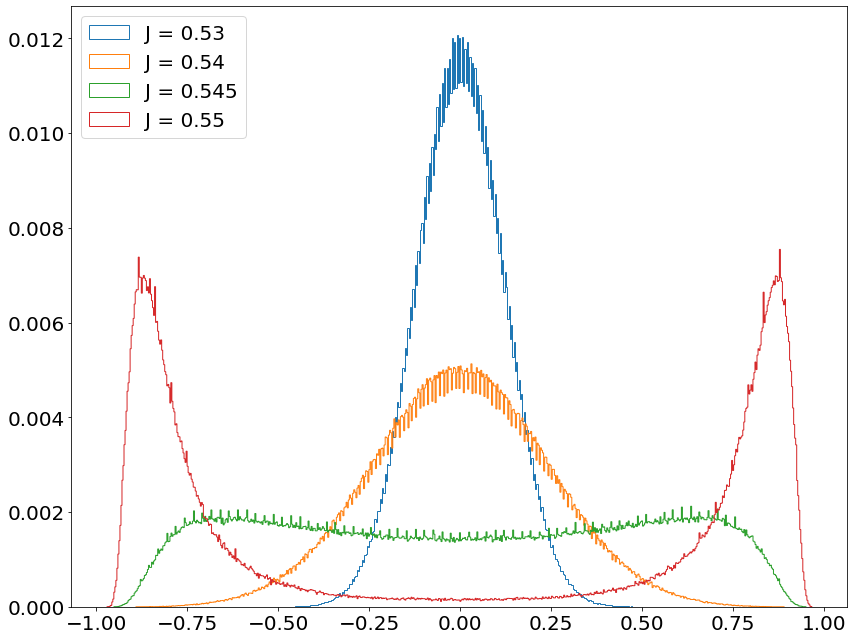

In [50]:
fig, ax = plt.subplots(figsize=(12,9))
for J, d in zip(*data):
    plt.hist(d[0]/N, bins=len(d[0])//10, weights=d[1]/d[1].sum(), histtype='step', label=f'J = {J}')
plt.legend(fontsize=20)
plt.tick_params(labelsize=20)
plt.tight_layout()
#plt.savefig(Photos_dir / 'TrIsISAW_m2_distr.png')